In [1]:
import dgl
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt               

In [2]:
from dgl.dataloading import GraphDataLoader
from torch.utils.data.sampler import SubsetRandomSampler

In [3]:
datasetA = dgl.data.CSVDataset('../../Dati/Dataset_1vsAll/AvsAll/')
datasetA

Done loading data from cached files.


Dataset("DatasetA", num_graphs=1170, save_path=../../Dati/Dataset_1vsAll/AvsAll/DatasetA)

In [4]:
datasetB = dgl.data.CSVDataset('../../Dati/Dataset_1vsAll/BvsAll/')
datasetB

Done loading data from cached files.


Dataset("DatasetB", num_graphs=1170, save_path=../../Dati/Dataset_1vsAll/BvsAll/DatasetB)

In [5]:
datasetC = dgl.data.CSVDataset('../../Dati/Dataset_1vsAll/CvsAll/')
datasetC

Done loading data from cached files.


Dataset("DatasetC", num_graphs=1170, save_path=../../Dati/Dataset_1vsAll/CvsAll/DatasetC)

In [6]:
datasetD = dgl.data.CSVDataset('../../Dati/Dataset_1vsAll/DvsAll/')
datasetD

Done loading data from cached files.


Dataset("DatasetD", num_graphs=1170, save_path=../../Dati/Dataset_1vsAll/DvsAll/DatasetD)

In [7]:
dim_nfeats = 2
gclasses = 2

In [8]:
size_batch = 4
size_batch

4

In [9]:
num_examplesA = len(datasetA)
num_trainA = int(num_examplesA * 0.8)

train_samplerA = SubsetRandomSampler(torch.arange(num_trainA))
test_samplerA = SubsetRandomSampler(torch.arange(num_trainA, num_examplesA))

train_dataloaderA = GraphDataLoader(
    datasetA, sampler=train_samplerA, batch_size= size_batch, drop_last=False)
test_dataloaderA = GraphDataLoader(
    datasetA, sampler=test_samplerA, batch_size= size_batch, drop_last=False)

In [10]:
num_examplesB = len(datasetB)
num_trainB = int(num_examplesB * 0.8)

train_samplerB = SubsetRandomSampler(torch.arange(num_trainB))
test_samplerB = SubsetRandomSampler(torch.arange(num_trainB, num_examplesB))

train_dataloaderB = GraphDataLoader(
    datasetB, sampler=train_samplerB, batch_size= size_batch, drop_last=False)
test_dataloaderB = GraphDataLoader(
    datasetB, sampler=test_samplerB, batch_size= size_batch, drop_last=False)

In [11]:
num_examplesC = len(datasetC)
num_trainC = int(num_examplesC * 0.8)

train_samplerC = SubsetRandomSampler(torch.arange(num_trainC))
test_samplerC = SubsetRandomSampler(torch.arange(num_trainC, num_examplesC))

train_dataloaderC = GraphDataLoader(
    datasetC, sampler=train_samplerC, batch_size= size_batch, drop_last=False)
test_dataloaderC = GraphDataLoader(
    datasetC, sampler=test_samplerC, batch_size= size_batch, drop_last=False)

In [12]:
num_examplesD = len(datasetD)
num_trainD = int(num_examplesD * 0.8)

train_samplerD = SubsetRandomSampler(torch.arange(num_trainD))
test_samplerD = SubsetRandomSampler(torch.arange(num_trainD, num_examplesD))

train_dataloaderD = GraphDataLoader(
    datasetD, sampler=train_samplerD, batch_size= size_batch, drop_last=False)
test_dataloaderD = GraphDataLoader(
    datasetD, sampler=test_samplerD, batch_size= size_batch, drop_last=False)

In [13]:
from dgl.nn import GraphConv

class GCN(nn.Module):
    def __init__(self, in_feats, h_feats, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GraphConv(in_feats, h_feats)
        self.conv2 = GraphConv(h_feats, num_classes)

    def forward(self, g, in_feat):
        h = self.conv1(g, in_feat)
        h = F.relu(h)
        h = self.conv2(g, h)
        g.ndata['h'] = h
        return dgl.mean_nodes(g, 'h')

In [14]:
num_of_epoches = 350

In [15]:
modelA = GCN(dim_nfeats, 256, gclasses)
optimizerA = torch.optim.Adam(modelA.parameters(), lr=0.01)



for epoch in range(num_of_epoches):
    print("Epoca: ", epoch)
    for batched_graph, labels in train_dataloaderA:
        predA = modelA(batched_graph, batched_graph.ndata['label'].float())
        lossA = F.cross_entropy(predA, labels['label'].long())
        #print("epoca: ", epoch, loss)
        optimizerA.zero_grad()
        #print(optimizer)
        lossA.backward()
        #print(loss)
        optimizerA.step()
        #print(optimizer)
    

Epoca:  0


/Applications/anaconda3/lib/python3.8/site-packages/torch/autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoca:  1
Epoca:  2
Epoca:  3
Epoca:  4
Epoca:  5
Epoca:  6
Epoca:  7
Epoca:  8
Epoca:  9
Epoca:  10
Epoca:  11
Epoca:  12
Epoca:  13
Epoca:  14
Epoca:  15
Epoca:  16
Epoca:  17
Epoca:  18
Epoca:  19
Epoca:  20
Epoca:  21
Epoca:  22
Epoca:  23
Epoca:  24
Epoca:  25
Epoca:  26
Epoca:  27
Epoca:  28
Epoca:  29
Epoca:  30
Epoca:  31
Epoca:  32
Epoca:  33
Epoca:  34
Epoca:  35
Epoca:  36
Epoca:  37
Epoca:  38
Epoca:  39
Epoca:  40
Epoca:  41
Epoca:  42
Epoca:  43
Epoca:  44
Epoca:  45
Epoca:  46
Epoca:  47
Epoca:  48
Epoca:  49
Epoca:  50
Epoca:  51
Epoca:  52
Epoca:  53
Epoca:  54
Epoca:  55
Epoca:  56
Epoca:  57
Epoca:  58
Epoca:  59
Epoca:  60
Epoca:  61
Epoca:  62
Epoca:  63
Epoca:  64
Epoca:  65
Epoca:  66
Epoca:  67
Epoca:  68
Epoca:  69
Epoca:  70
Epoca:  71
Epoca:  72
Epoca:  73
Epoca:  74
Epoca:  75
Epoca:  76
Epoca:  77
Epoca:  78
Epoca:  79
Epoca:  80
Epoca:  81
Epoca:  82
Epoca:  83
Epoca:  84
Epoca:  85
Epoca:  86
Epoca:  87
Epoca:  88
Epoca:  89
Epoca:  90
Epoca:  91
Epoca:  

In [16]:
num_correct = 0
num_tests = 0
for batched_graph, labels in test_dataloaderA:
    predA = modelA(batched_graph, batched_graph.ndata['label'].float())
    num_correct += (predA.argmax(1) == labels['label'].long()).sum().item()
    num_tests += len(labels['label'].long())
    
    
print('Test accuracy:', num_correct / num_tests)

Test accuracy: 0.7264957264957265


In [17]:
modelB = GCN(dim_nfeats, 256, gclasses)
optimizerB = torch.optim.Adam(modelB.parameters(), lr=0.01)



for epoch in range(num_of_epoches):
    print("Epoca: ", epoch)
    for batched_graph, labels in train_dataloaderB:
        predB = modelB(batched_graph, batched_graph.ndata['label'].float())
        lossB = F.cross_entropy(predB, labels['label'].long())
        #print("epoca: ", epoch, loss)
        optimizerB.zero_grad()
        #print(optimizer)
        lossB.backward()
        #print(loss)
        optimizerB.step()
        #print(optimizer)
    

Epoca:  0
Epoca:  1
Epoca:  2
Epoca:  3
Epoca:  4
Epoca:  5
Epoca:  6
Epoca:  7
Epoca:  8
Epoca:  9
Epoca:  10
Epoca:  11
Epoca:  12
Epoca:  13
Epoca:  14
Epoca:  15
Epoca:  16
Epoca:  17
Epoca:  18
Epoca:  19
Epoca:  20
Epoca:  21
Epoca:  22
Epoca:  23
Epoca:  24
Epoca:  25
Epoca:  26
Epoca:  27
Epoca:  28
Epoca:  29
Epoca:  30
Epoca:  31
Epoca:  32
Epoca:  33
Epoca:  34
Epoca:  35
Epoca:  36
Epoca:  37
Epoca:  38
Epoca:  39
Epoca:  40
Epoca:  41
Epoca:  42
Epoca:  43
Epoca:  44
Epoca:  45
Epoca:  46
Epoca:  47
Epoca:  48
Epoca:  49
Epoca:  50
Epoca:  51
Epoca:  52
Epoca:  53
Epoca:  54
Epoca:  55
Epoca:  56
Epoca:  57
Epoca:  58
Epoca:  59
Epoca:  60
Epoca:  61
Epoca:  62
Epoca:  63
Epoca:  64
Epoca:  65
Epoca:  66
Epoca:  67
Epoca:  68
Epoca:  69
Epoca:  70
Epoca:  71
Epoca:  72
Epoca:  73
Epoca:  74
Epoca:  75
Epoca:  76
Epoca:  77
Epoca:  78
Epoca:  79
Epoca:  80
Epoca:  81
Epoca:  82
Epoca:  83
Epoca:  84
Epoca:  85
Epoca:  86
Epoca:  87
Epoca:  88
Epoca:  89
Epoca:  90
Epoca:  9

In [18]:
num_correct = 0
num_tests = 0
for batched_graph, labels in test_dataloaderB:
    predB = modelB(batched_graph, batched_graph.ndata['label'].float())
    num_correct += (predB.argmax(1) == labels['label'].long()).sum().item()
    num_tests += len(labels['label'].long())
    
    
print('Test accuracy:', num_correct / num_tests)

Test accuracy: 0.8888888888888888


In [19]:
modelC = GCN(dim_nfeats, 256, gclasses)
optimizerC = torch.optim.Adam(modelC.parameters(), lr=0.01)



for epoch in range(num_of_epoches):
    print("Epoca: ", epoch)
    for batched_graph, labels in train_dataloaderC:
        predC = modelC(batched_graph, batched_graph.ndata['label'].float())
        lossC = F.cross_entropy(predC, labels['label'].long())
        #print("epoca: ", epoch, loss)
        optimizerC.zero_grad()
        #print(optimizer)
        lossC.backward()
        #print(loss)
        optimizerC.step()
        #print(optimizer)
    

Epoca:  0
Epoca:  1
Epoca:  2
Epoca:  3
Epoca:  4
Epoca:  5
Epoca:  6
Epoca:  7
Epoca:  8
Epoca:  9
Epoca:  10
Epoca:  11
Epoca:  12
Epoca:  13
Epoca:  14
Epoca:  15
Epoca:  16
Epoca:  17
Epoca:  18
Epoca:  19
Epoca:  20
Epoca:  21
Epoca:  22
Epoca:  23
Epoca:  24
Epoca:  25
Epoca:  26
Epoca:  27
Epoca:  28
Epoca:  29
Epoca:  30
Epoca:  31
Epoca:  32
Epoca:  33
Epoca:  34
Epoca:  35
Epoca:  36
Epoca:  37
Epoca:  38
Epoca:  39
Epoca:  40
Epoca:  41
Epoca:  42
Epoca:  43
Epoca:  44
Epoca:  45
Epoca:  46
Epoca:  47
Epoca:  48
Epoca:  49
Epoca:  50
Epoca:  51
Epoca:  52
Epoca:  53
Epoca:  54
Epoca:  55
Epoca:  56
Epoca:  57
Epoca:  58
Epoca:  59
Epoca:  60
Epoca:  61
Epoca:  62
Epoca:  63
Epoca:  64
Epoca:  65
Epoca:  66
Epoca:  67
Epoca:  68
Epoca:  69
Epoca:  70
Epoca:  71
Epoca:  72
Epoca:  73
Epoca:  74
Epoca:  75
Epoca:  76
Epoca:  77
Epoca:  78
Epoca:  79
Epoca:  80
Epoca:  81
Epoca:  82
Epoca:  83
Epoca:  84
Epoca:  85
Epoca:  86
Epoca:  87
Epoca:  88
Epoca:  89
Epoca:  90
Epoca:  9

In [20]:
num_correct = 0
num_tests = 0
for batched_graph, labels in test_dataloaderC:
    predC = modelC(batched_graph, batched_graph.ndata['label'].float())
    num_correct += (predC.argmax(1) == labels['label'].long()).sum().item()
    num_tests += len(labels['label'].long())
    
    
print('Test accuracy:', num_correct / num_tests)

Test accuracy: 0.7393162393162394


In [21]:
modelD = GCN(dim_nfeats, 256, gclasses)
optimizerD = torch.optim.Adam(modelD.parameters(), lr=0.01)



for epoch in range(num_of_epoches):
    print("Epoca: ", epoch)
    for batched_graph, labels in train_dataloaderD:
        predD = modelD(batched_graph, batched_graph.ndata['label'].float())
        lossD = F.cross_entropy(predD, labels['label'].long())
        #print("epoca: ", epoch, loss)
        optimizerD.zero_grad()
        #print(optimizer)
        lossD.backward()
        #print(loss)
        optimizerD.step()
        #print(optimizer)
    

Epoca:  0
Epoca:  1
Epoca:  2
Epoca:  3
Epoca:  4
Epoca:  5
Epoca:  6
Epoca:  7
Epoca:  8
Epoca:  9
Epoca:  10
Epoca:  11
Epoca:  12
Epoca:  13
Epoca:  14
Epoca:  15
Epoca:  16
Epoca:  17
Epoca:  18
Epoca:  19
Epoca:  20
Epoca:  21
Epoca:  22
Epoca:  23
Epoca:  24
Epoca:  25
Epoca:  26
Epoca:  27
Epoca:  28
Epoca:  29
Epoca:  30
Epoca:  31
Epoca:  32
Epoca:  33
Epoca:  34
Epoca:  35
Epoca:  36
Epoca:  37
Epoca:  38
Epoca:  39
Epoca:  40
Epoca:  41
Epoca:  42
Epoca:  43
Epoca:  44
Epoca:  45
Epoca:  46
Epoca:  47
Epoca:  48
Epoca:  49
Epoca:  50
Epoca:  51
Epoca:  52
Epoca:  53
Epoca:  54
Epoca:  55
Epoca:  56
Epoca:  57
Epoca:  58
Epoca:  59
Epoca:  60
Epoca:  61
Epoca:  62
Epoca:  63
Epoca:  64
Epoca:  65
Epoca:  66
Epoca:  67
Epoca:  68
Epoca:  69
Epoca:  70
Epoca:  71
Epoca:  72
Epoca:  73
Epoca:  74
Epoca:  75
Epoca:  76
Epoca:  77
Epoca:  78
Epoca:  79
Epoca:  80
Epoca:  81
Epoca:  82
Epoca:  83
Epoca:  84
Epoca:  85
Epoca:  86
Epoca:  87
Epoca:  88
Epoca:  89
Epoca:  90
Epoca:  9

In [22]:
num_correct = 0
num_tests = 0
for batched_graph, labels in test_dataloaderD:
    predD = modelD(batched_graph, batched_graph.ndata['label'].float())
    num_correct += (predD.argmax(1) == labels['label'].long()).sum().item()
    num_tests += len(labels['label'].long())
    
    
print('Test accuracy:', num_correct / num_tests)

Test accuracy: 0.7564102564102564


In [23]:
dataset = dgl.data.CSVDataset('../../Dati/Dataset/')
dataset

Done loading data from cached files.


Dataset("Dataset", num_graphs=1170, save_path=../../Dati/Dataset/Dataset)

In [39]:
n = 0
p = 0
d = 0
c = 0
cc = 0

ok = 0

pred = []
lab = []
for graph, labels in dataset:
   # print("///")
    A = nn.Sigmoid()
    B = nn.Sigmoid()
    C = nn.Sigmoid()
    D = nn.Sigmoid()
    
    predA = modelA(graph, graph.ndata['label'].float())
    predB = modelB(graph, graph.ndata['label'].float())
    predC = modelC(graph, graph.ndata['label'].float())
    predD = modelD(graph, graph.ndata['label'].float())
    
    sigA = A(predA)
    sigB = B(predB)
    sigC = C(predC)
    sigD = D(predD)
    
    val_sig = []

    val_sig.append(sigA[0][1].item())
    val_sig.append(sigB[0][1].item())
    val_sig.append(sigC[0][1].item())
    val_sig.append(sigD[0][1].item())

    #print(sigA[0][1].item(), sigB[0][1].item(), sigC[0][1].item(), sigD[0][1].item())
    val_sig = torch.tensor(val_sig)
    
    sigm_result = val_sig.argmax().item()
    
    n += 1
    
    #equivalente a 
    """val_sig.append(sigA[0][0].item())
    val_sig.append(sigB[0][0].item())
    val_sig.append(sigC[0][0].item())
    val_sig.append(sigD[0][0].item())


    val_sig = torch.tensor(val_sig)
    
    sigm_result = val_sig.argmin().item()"""
    
    pred.append(sigm_result)
    lab.append(labels['label'].long())
    if sigm_result == labels['label'].long():
        #print(sigm_result , labels['label'].long())
        c += 1
        
    """print("pred", sigm_result)
    print(labels['label'].long())
    print("///")"""
print(p, d, c, cc)
print("Grafi classificati correttamente ", c, "su ", n, "grafi, con ", p, "grafi non classificati.")
print("Accuratezza ottenuata ", c/n)
print("Accuratezza ottenuata senza considerare i grafi non classificati ", c/(n-p))

0 0 609 0
Grafi classificati correttamente  609 su  1170 grafi, con  0 grafi non classificati.
Accuratezza ottenuata  0.5205128205128206
Accuratezza ottenuata senza considerare i grafi non classificati  0.5205128205128206


In [40]:
from sklearn.metrics import classification_report

In [41]:
report=classification_report(pred, lab)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.91      0.67      0.78       384
           2       0.96      0.51      0.67       552
           3       0.22      0.28      0.25       234

    accuracy                           0.52      1170
   macro avg       0.52      0.37      0.42      1170
weighted avg       0.80      0.52      0.62      1170



/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
import scikitplot as skplt

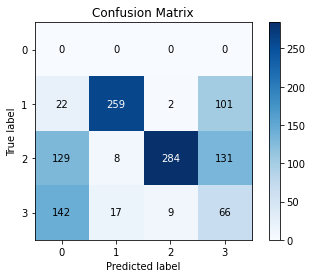

In [43]:
skplt.metrics.plot_confusion_matrix(pred, lab)
plt.show()